Import Modules

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display
import librosa
import os
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load TESS Data

In [23]:
tess_paths = []
tess_labels  = []


for dirname, _, filenames in os.walk('./data/TESS'):
    for filename in filenames:
        tess_paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1].split('.')[0]
        if label == 'ps':
            tess_labels.append('surprise')
        else:
            tess_labels.append(label)


In [25]:
# creating a dataframe
tess_df = pd.DataFrame()
tess_df['path'] = tess_paths
tess_df['emotion'] = tess_labels
tess_df.head()

,path,emotion
0,./data/TESS\OAF_angry\OAF_back_angry.wav,angry
1,./data/TESS\OAF_angry\OAF_bar_angry.wav,angry
2,./data/TESS\OAF_angry\OAF_base_angry.wav,angry
3,./data/TESS\OAF_angry\OAF_bath_angry.wav,angry
4,./data/TESS\OAF_angry\OAF_bean_angry.wav,angry


In [27]:
tess_df['emotion'].value_counts()

emotion
angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: count, dtype: int64

## Load SAVEE Data

In [32]:
savee_paths = []
savee_labels = []

for dirname, _, filenames in os.walk('./data/SAVEE'):
    for filename in filenames:
        if filename.endswith('.wav'):
            savee_paths.append(os.path.join(dirname, filename))
            part = filename.split('_')[1]
            ele = part[:-6]
            if ele=='a':
                savee_labels.append('angry')
            elif ele=='d':
                savee_labels.append('disgust')
            elif ele=='f':
                savee_labels.append('fear')
            elif ele=='h':
                savee_labels.append('happy')
            elif ele=='n':
                savee_labels.append('neutral')
            elif ele=='sa':
                savee_labels.append('sad')
            else:
                savee_labels.append('surprise')

In [35]:
savee_df = pd.DataFrame()
savee_df['path'] = savee_paths
savee_df['emotion'] = savee_labels
savee_df.head()

,path,emotion
0,./data/SAVEE\ALL\DC_a01.wav,angry
1,./data/SAVEE\ALL\DC_a02.wav,angry
2,./data/SAVEE\ALL\DC_a03.wav,angry
3,./data/SAVEE\ALL\DC_a04.wav,angry
4,./data/SAVEE\ALL\DC_a05.wav,angry


In [34]:
savee_df['emotion'].value_counts()

emotion
neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: count, dtype: int64

In [36]:
df = pd.concat([tess_df, savee_df], ignore_index=True)

In [45]:
df.head()

,path,emotion
0,./data/TESS\OAF_angry\OAF_back_angry.wav,angry
1,./data/TESS\OAF_angry\OAF_bar_angry.wav,angry
2,./data/TESS\OAF_angry\OAF_base_angry.wav,angry
3,./data/TESS\OAF_angry\OAF_bath_angry.wav,angry
4,./data/TESS\OAF_angry\OAF_bean_angry.wav,angry


### Exploratory Data Analysis

emotion
neutral     520
angry       460
disgust     460
fear        460
happy       460
surprise    460
sad         460
Name: count, dtype: int64


<Axes: xlabel='emotion', ylabel='count'>

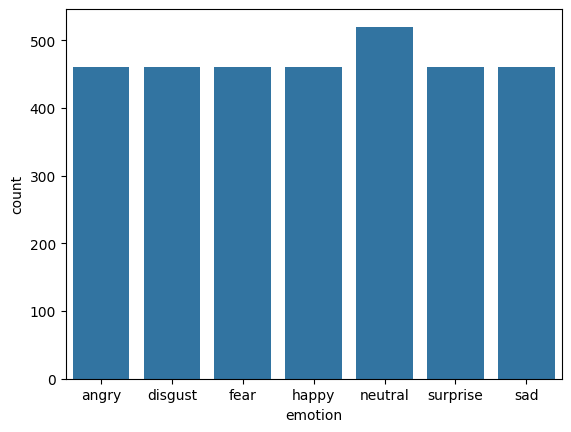

In [42]:
print(df['emotion'].value_counts())
sns.countplot(data=df, x='emotion') # the dataset is balanced

In [43]:
def waveplot(data, sample_rate, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sample_rate)
    plt.show()


def spectrogram(data, sample_rate, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.colorbar


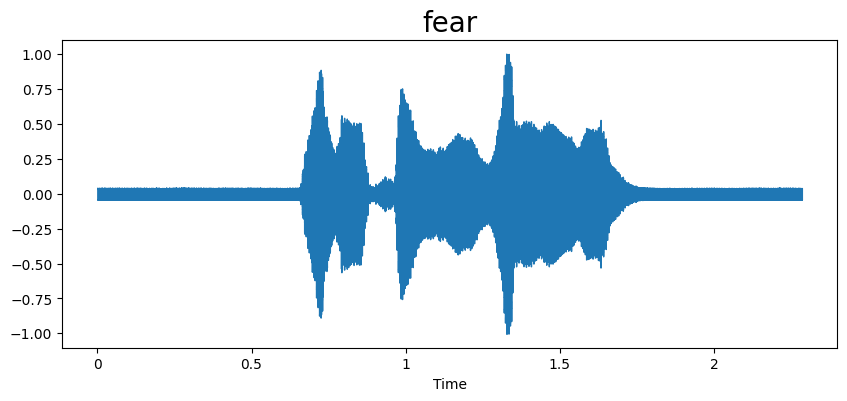

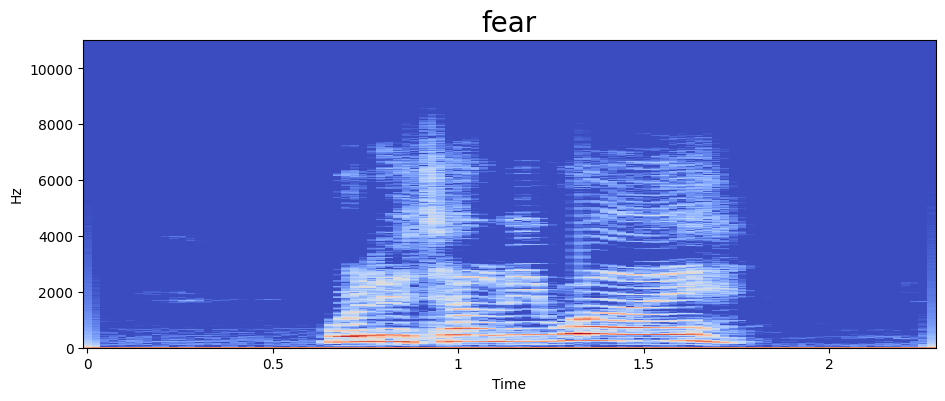

In [49]:
# Filters the DataFrame to get only the rows where the 'emotion' column matches the specified emotion value.
emotion = 'fear'
p = df['path'][df['emotion']==emotion].iloc[402]
data, sampling_rate = librosa.load(p)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(p)

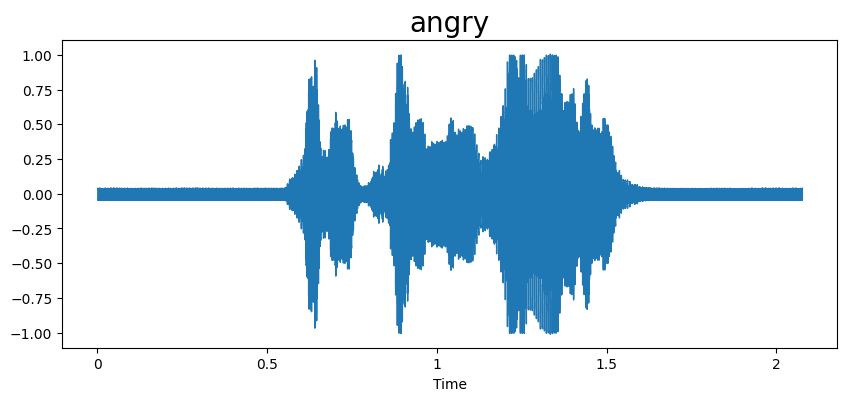

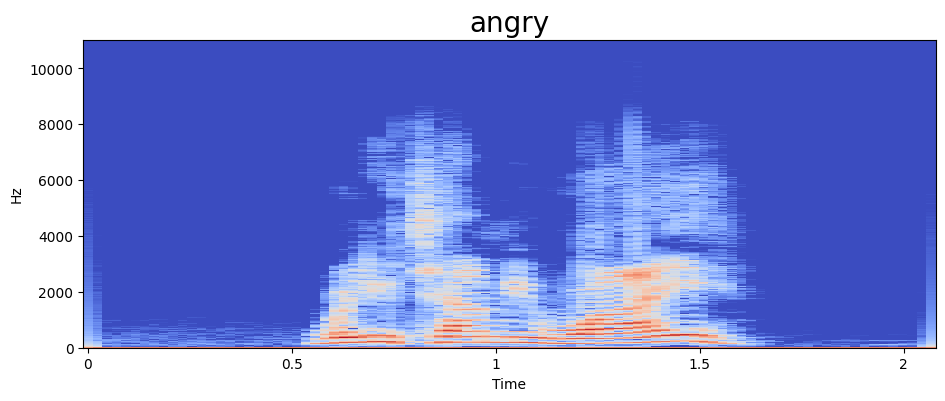

In [48]:
# Filters the DataFrame to get only the rows where the 'emotion' column matches the specified emotion value.
emotion = 'angry'
p = df['path'][df['emotion']==emotion].iloc[402]
data, sampling_rate = librosa.load(p)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(p)

### Feature Extraction

In [63]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    y = librosa.util.normalize(y)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc
    

In [64]:
extract_mfcc(df['path'][0])

array([-2.8964111e+02,  7.7440544e+01, -1.9592791e+01, -2.1666687e+01,
       -2.1127567e+00,  1.0075365e+01, -2.0366709e+01, -6.0924492e+00,
       -7.2122808e+00, -5.5736440e-01, -1.8325534e+00,  2.0210281e-01,
        7.2755235e-01,  1.3177371e+00,  2.8863375e+00,  2.8557909e+00,
       -4.7129216e+00, -4.4365115e+00, -1.6211596e+00, -1.0239839e+01,
       -7.5512648e+00, -1.7968799e+00, -7.0376506e+00,  9.4365816e+00,
        8.3558531e+00,  2.1712360e+01,  1.9216990e+01,  2.0348930e+01,
        1.3413368e+01,  8.3391714e+00,  3.9472276e-01,  5.1113148e+00,
        9.5687389e+00,  5.4548674e+00,  2.5099630e+00, -1.8239076e+00,
        4.8689609e+00,  9.3139238e+00,  2.0891497e+00, -1.9064902e+00],
      dtype=float32)

In [65]:
X_mfcc = df['path'].apply(lambda x: extract_mfcc(x))

In [66]:
X_mfcc

0       [-289.6411, 77.440544, -19.59279, -21.666687, ...
1       [-294.15466, 98.77373, 0.6560099, -32.74544, -...
2       [-272.72925, 46.124, 1.5550473, -0.21709438, 2...
3       [-274.65683, 76.32369, -12.531776, -22.288858,...
4       [-230.06999, 77.4455, 10.8655, 16.092945, 8.04...
                              ...                        
3275    [-302.6755, 117.21683, 26.249664, 47.466187, 8...
3276    [-298.62213, 131.75406, 25.293446, 39.819622, ...
3277    [-361.58017, 129.49156, 37.857147, 28.908354, ...
3278    [-323.08148, 113.9488, 19.898464, 24.734169, -...
3279    [-331.59802, 127.30222, 26.700256, 28.051023, ...
Name: path, Length: 3280, dtype: object

In [67]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape


(3280, 40)

In [68]:
## input split
X = np.expand_dims(X, -1)
X.shape

(3280, 40, 1)

In [69]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y = encoder.fit_transform(df[['emotion']])

In [70]:
y = y.toarray()

In [71]:
y.shape

(3280, 7)

## LSTM model

In [72]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 123)               61500     
                                                                 
 dense_6 (Dense)             (None, 64)                7936      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-trai

In [73]:
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

Epoch 1/100
6/6 [==============================] - 5s 411ms/step - loss: 1.9140 - accuracy: 0.1932 - val_loss: 1.9505 - val_accuracy: 0.0976
Epoch 2/100
6/6 [==============================] - 1s 206ms/step - loss: 1.7656 - accuracy: 0.3792 - val_loss: 1.9546 - val_accuracy: 0.1037
Epoch 3/100
2/6 [=========>....................] - ETA: 1s - loss: 1.6607 - accuracy: 0.4746

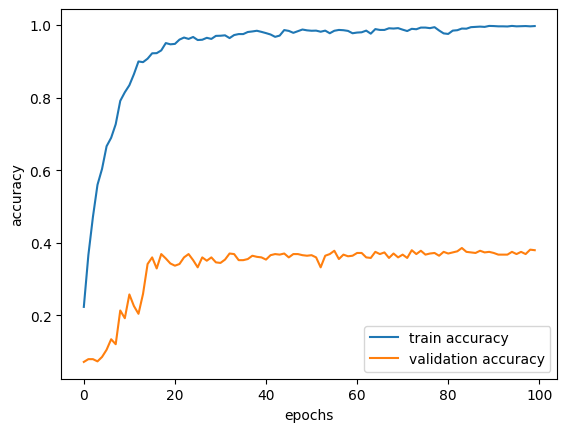

In [61]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

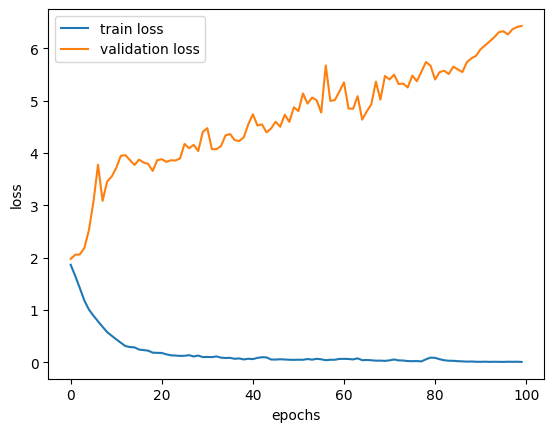

In [62]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()